In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.3 MB/s eta 0:00:00


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


# Modeling & Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier, plot_importance, plot_tree
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight




# 1. Data Acquisition

In [88]:
df = pd.read_csv("https://raw.githubusercontent.com/teresatendeas/Typhoid-Status-Prediction/refs/heads/main/Typhoid_dataset.csv")

In [89]:
df

,Age,Gender,Location,Socioeconomic Status,Water Source Type,Sanitation Facilities,Hand Hygiene,Consumption of Street Food,Fever Duration (Days),Gastrointestinal Symptoms,...,White Blood Cell Count,Platelet Count,Blood Culture Result,Widal Test,Typhidot Test,Typhoid Vaccination Status,Previous History of Typhoid,Weather Condition,Ongoing Infection in Society,Typhoid Status
0,37,Female,Endemic,High,Untreated Supply,Proper,Yes,No,0,Diarrhea,...,3446,300334,Negative,High O & H Antibody,IgG Positive,Received,Yes,Hot & Dry,Dengue Outbreak,Normal or No Typhoid
1,26,Male,Endemic,Middle,Tap,Proper,Yes,No,16,Constipation,...,8002,158635,Positive,High O & H Antibody,Negative,Not Received,Yes,Rainy & Wet,Dengue Outbreak,Relapsing Typhoid
2,79,Female,Urban,Middle,Untreated Supply,Open Defecation,No,No,17,NaN,...,16488,193736,Positive,Low O & H Antibody,Negative,Received,No,Hot & Dry,COVID-19 Surge,Complicated Typhoid
3,9,Female,Endemic,High,River,Proper,No,No,0,Constipation,...,6390,283273,Negative,High O & H Antibody,Negative,Not Received,Yes,Hot & Dry,COVID-19 Surge,Normal or No Typhoid
4,32,Male,Urban,High,Untreated Supply,Proper,No,Yes,13,Diarrhea,...,10399,241089,Positive,Low O & H Antibody,Negative,Not Received,Yes,Moderate,Dengue Outbreak,Relapsing Typhoid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31082,69,Male,Rural,Low,Well,Open Defecation,No,No,0,Diarrhea,...,6008,393632,Negative,High O & H Antibody,IgG Positive,Received,Yes,Hot & Dry,COVID-19 Surge,Normal or No Typhoid
31083,50,Male,Rural,Middle,Well,Open Defecation,Yes,Yes,2,Diarrhea,...,9809,403479,Positive,Low O & H Antibody,IgM Positive,Received,No,Moderate,NaN,Acute Typhoid Fever
31084,77,Female,Rural,Middle,River,Open Defecation,No,No,0,Constipation,...,7362,215301,Negative,Low O & H Antibody,IgM Positive,Not Received,Yes,Rainy & Wet,NaN,Normal or No Typhoid
31085,34,Female,Rural,Middle,Tap,Proper,Yes,Yes,13,Abdominal Pain,...,6032,177619,Positive,High O & H Antibody,Negative,Not Received,No,Hot & Dry,Dengue Outbreak,Acute Typhoid Fever


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31087 entries, 0 to 31086
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           31087 non-null  int64 
 1   Gender                        31087 non-null  object
 2   Location                      31087 non-null  object
 3   Socioeconomic Status          31087 non-null  object
 4   Water Source Type             31087 non-null  object
 5   Sanitation Facilities         31087 non-null  object
 6   Hand Hygiene                  31087 non-null  object
 7   Consumption of Street Food    31087 non-null  object
 8   Fever Duration (Days)         31087 non-null  int64 
 9   Gastrointestinal Symptoms     23327 non-null  object
 10  Neurological Symptoms         23343 non-null  object
 11  Skin Manifestations           31087 non-null  object
 12  Complications                 940 non-null    object
 13  White Blood Cell

In [6]:
df.nunique()

,0
Age,80
Gender,2
Location,3
Socioeconomic Status,3
Water Source Type,4
Sanitation Facilities,2
Hand Hygiene,2
Consumption of Street Food,2
Fever Duration (Days),22
Gastrointestinal Symptoms,3


In [7]:
df.columns

Index(['Age', 'Gender', 'Location', 'Socioeconomic Status',
       'Water Source Type', 'Sanitation Facilities', 'Hand Hygiene',
       'Consumption of Street Food', 'Fever Duration (Days)',
       'Gastrointestinal Symptoms', 'Neurological Symptoms',
       'Skin Manifestations', 'Complications', 'White Blood Cell Count',
       'Platelet Count', 'Blood Culture Result', 'Widal Test', 'Typhidot Test',
       'Typhoid Vaccination Status', 'Previous History of Typhoid',
       'Weather Condition', 'Ongoing Infection in Society', 'Typhoid Status'],
      dtype='object')

In [8]:
df.describe()

,Age,Fever Duration (Days),White Blood Cell Count,Platelet Count
count,31087.000000,31087.000000,31087.000000,31087.000000
mean,40.470743,3.182231,7357.771705,269143.393927
std,23.137406,5.945978,2908.808088,107513.676920
min,1.000000,0.000000,3000.000000,50001.000000
25%,20.000000,0.000000,5078.500000,184965.000000
50%,40.000000,0.000000,7160.000000,273045.000000
75%,61.000000,3.000000,9266.000000,360307.000000
max,80.000000,21.000000,19994.000000,449994.000000


In [9]:
df['Complications'].unique()

array([nan, 'Meningitis', 'Sepsis', 'Intestinal Perforation'],
      dtype=object)

# 2. Data Cleaning

## 2.1 Drop unwanted columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31087 entries, 0 to 31086
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           31087 non-null  int64 
 1   Gender                        31087 non-null  object
 2   Location                      31087 non-null  object
 3   Socioeconomic Status          31087 non-null  object
 4   Water Source Type             31087 non-null  object
 5   Sanitation Facilities         31087 non-null  object
 6   Hand Hygiene                  31087 non-null  object
 7   Consumption of Street Food    31087 non-null  object
 8   Fever Duration (Days)         31087 non-null  int64 
 9   Gastrointestinal Symptoms     23327 non-null  object
 10  Neurological Symptoms         23343 non-null  object
 11  Skin Manifestations           31087 non-null  object
 12  Complications                 940 non-null    object
 13  White Blood Cell

In [11]:
# Remove outcome/post-admission variable (to avoid leakage)
df = df.drop(['Complications'], axis=1)

In [12]:
# Remove post admission-time prediction (to avoid leakage)
df = df.drop(['Blood Culture Result'], axis=1)

## 2.2 Fill missing values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31087 entries, 0 to 31086
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           31087 non-null  int64 
 1   Gender                        31087 non-null  object
 2   Location                      31087 non-null  object
 3   Socioeconomic Status          31087 non-null  object
 4   Water Source Type             31087 non-null  object
 5   Sanitation Facilities         31087 non-null  object
 6   Hand Hygiene                  31087 non-null  object
 7   Consumption of Street Food    31087 non-null  object
 8   Fever Duration (Days)         31087 non-null  int64 
 9   Gastrointestinal Symptoms     23327 non-null  object
 10  Neurological Symptoms         23343 non-null  object
 11  Skin Manifestations           31087 non-null  object
 12  White Blood Cell Count        31087 non-null  int64 
 13  Platelet Count  

In [14]:
df['Gastrointestinal Symptoms'].unique()

array(['Diarrhea', 'Constipation', nan, 'Abdominal Pain'], dtype=object)

In [15]:
df['Neurological Symptoms'].unique()

array(['Headache', 'Confusion', 'Delirium', nan], dtype=object)

In [16]:
df['Ongoing Infection in Society'].unique()

array(['Dengue Outbreak', 'COVID-19 Surge', 'Seasonal Flu', nan],
      dtype=object)

In [17]:
cols_to_fill = ['Gastrointestinal Symptoms', 'Neurological Symptoms', 'Ongoing Infection in Society']
df[cols_to_fill] = df[cols_to_fill].fillna('None')

## 2.3 Fix datatypes

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31087 entries, 0 to 31086
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           31087 non-null  int64 
 1   Gender                        31087 non-null  object
 2   Location                      31087 non-null  object
 3   Socioeconomic Status          31087 non-null  object
 4   Water Source Type             31087 non-null  object
 5   Sanitation Facilities         31087 non-null  object
 6   Hand Hygiene                  31087 non-null  object
 7   Consumption of Street Food    31087 non-null  object
 8   Fever Duration (Days)         31087 non-null  int64 
 9   Gastrointestinal Symptoms     31087 non-null  object
 10  Neurological Symptoms         31087 non-null  object
 11  Skin Manifestations           31087 non-null  object
 12  White Blood Cell Count        31087 non-null  int64 
 13  Platelet Count  

In [19]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df[cat_cols] = df[cat_cols].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31087 entries, 0 to 31086
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           31087 non-null  int64   
 1   Gender                        31087 non-null  category
 2   Location                      31087 non-null  category
 3   Socioeconomic Status          31087 non-null  category
 4   Water Source Type             31087 non-null  category
 5   Sanitation Facilities         31087 non-null  category
 6   Hand Hygiene                  31087 non-null  category
 7   Consumption of Street Food    31087 non-null  category
 8   Fever Duration (Days)         31087 non-null  int64   
 9   Gastrointestinal Symptoms     31087 non-null  category
 10  Neurological Symptoms         31087 non-null  category
 11  Skin Manifestations           31087 non-null  category
 12  White Blood Cell Count        31087 non-null  

In [21]:
target_col = "Typhoid Status"
df[target_col] = df[target_col].astype("category")

# 3. Exploratory Data Analysis

## 3.0 Target Variable

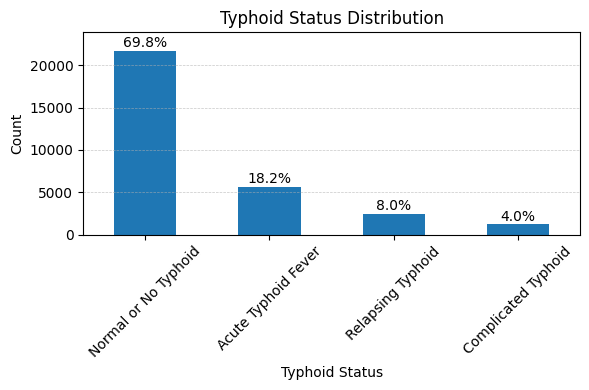

In [22]:
import matplotlib.pyplot as plt

# --- Count plot ---
ax = df[target_col].value_counts().plot(kind='bar', figsize=(6,4)) # Set color to gray
plt.title('Typhoid Status Distribution')
plt.xlabel('Typhoid Status')
plt.ylabel('Count')
plt.ylim(0, df[target_col].value_counts().max() * 1.1) # Extend y-axis by 10%
plt.xticks(rotation=45, ha='center') # Rotate x-axis labels by 45 degrees and center them

# Add thin gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)


# --- Compute percentages ---
counts = df[target_col].value_counts()
percentages = df[target_col].value_counts(normalize=True) * 100

# --- Annotate bars with % values ---
for i, (count, pct) in enumerate(zip(counts, percentages)):
    plt.text(i, count + 50, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()

# --- Optional: print detailed distribution ---
dist_df = pd.DataFrame({
    'Count': counts,
    'Percentage (%)': percentages.round(2)
})

### Overall (numeric)

In [23]:

num_cols = [c for c in ["Age","Fever Duration (Days)","White Blood Cell Count","Platelet Count"] if c in df.columns]
for c in num_cols:
    groups = [vals.dropna().values for _, vals in df.groupby(target_col)[c]]
    if len(groups) >= 2 and all(len(g)>1 for g in groups):
        from scipy.stats import f_oneway
        stat, p = f_oneway(*groups)
        print(f"ANOVA {c}: F={stat:.2f}, p={p:.3g}")


ANOVA Age: F=1.41, p=0.238
ANOVA Fever Duration (Days): F=20320.81, p=0
ANOVA White Blood Cell Count: F=5981.75, p=0
ANOVA Platelet Count: F=0.39, p=0.76


/tmp/ipython-input-707998254.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [vals.dropna().values for _, vals in df.groupby(target_col)[c]]


- We found that "Fever Duration" & "White Blood Cell Count" is highly significant

### Overall (categorical)

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cat_cols = [
    "Gender","Location","Socioeconomic Status",
    "Water Source Type","Sanitation Facilities","Hand Hygiene",
    "Street Food Consumption","Weather Conditions",
    "Typhoid Vaccination Status","Previous History of Typhoid","Ongoing Infection in Society",
    "Widal Test","Typhidot Test"
]
cat_cols = [c for c in cat_cols if c in df.columns]

rows = []
for c in cat_cols:
    ct = pd.crosstab(df[c], df[target_col])
    chi2, p, dof, _ = chi2_contingency(ct)
    v = cramers_v(ct)
    rows.append((c, p, v, dof, ct.shape[0]))
assoc_df = pd.DataFrame(rows, columns=["feature","p_value","cramers_v","dof","n_levels"]).sort_values(["p_value","cramers_v"])
assoc_df


,feature,p_value,cramers_v,dof,n_levels
9,Widal Test,0.049274,0.015888,3,2
8,Ongoing Infection in Society,0.072975,0.012983,9,4
3,Water Source Type,0.083581,0.012799,9,4
1,Location,0.099753,0.013089,6,3
7,Previous History of Typhoid,0.137956,0.013315,3,2
4,Sanitation Facilities,0.295583,0.010912,3,2
6,Typhoid Vaccination Status,0.583052,0.007918,3,2
0,Gender,0.604346,0.007712,3,2
10,Typhidot Test,0.673126,0.008047,6,3
5,Hand Hygiene,0.801625,0.005667,3,2


- No significance. But they may matter via interactions

## 3.1 Demographics & diagnosis visualization
(Age, Gender, Location, Socioeconomic Status, Ongoing Infection in Society)

### Overview

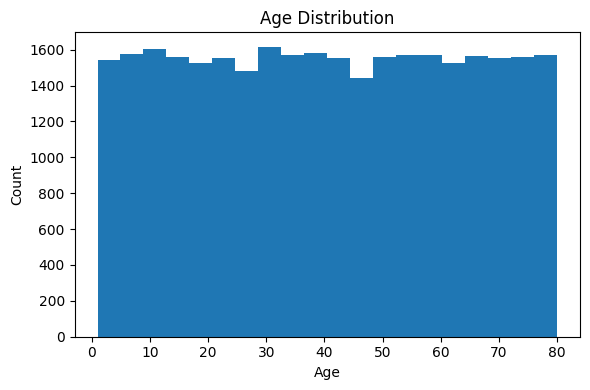

Typhoid Status,Acute Typhoid Fever,Complicated Typhoid,Normal or No Typhoid,Relapsing Typhoid
Gender,,,,
Female,0.179919,0.041207,0.697685,0.081189
Male,0.183504,0.039281,0.698460,0.078755


Typhoid Status,Acute Typhoid Fever,Complicated Typhoid,Normal or No Typhoid,Relapsing Typhoid
Location,,,,
Endemic,0.186140,0.043228,0.690310,0.080322
Rural,0.175812,0.040572,0.701985,0.081631
Urban,0.183115,0.036912,0.702005,0.077968


Typhoid Status,Acute Typhoid Fever,Complicated Typhoid,Normal or No Typhoid,Relapsing Typhoid
Socioeconomic Status,,,,
High,0.179868,0.038215,0.702327,0.079590
Low,0.182542,0.041266,0.695893,0.080299
Middle,0.182758,0.041268,0.695951,0.080023


In [25]:

for c in ["Age","Gender","Location","Socioeconomic Status"]:
    if c in df.columns:
        if c=="Age":
            plt.figure(figsize=(6,4)); plt.hist(df[c].dropna(), bins=20)
            plt.title("Age Distribution"); plt.xlabel("Age"); plt.ylabel("Count")
            plt.tight_layout(); plt.show()
        else:
            tab = pd.crosstab(df[c], df[target_col], normalize="index")
            display(tab)



### Subtask:
Create a stacked bar chart to visualize Typhoid Status across Age.

### Key finding:
Age is distributed well in this dataset.

/tmp/ipython-input-1416492140.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['Age', 'Typhoid Status']).size().reset_index(name='Count')
/tmp/ipython-input-1416492140.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivoted = df_grouped.pivot_table(index='Age', columns=['Typhoid Status'], values='Count', fill_value=0)


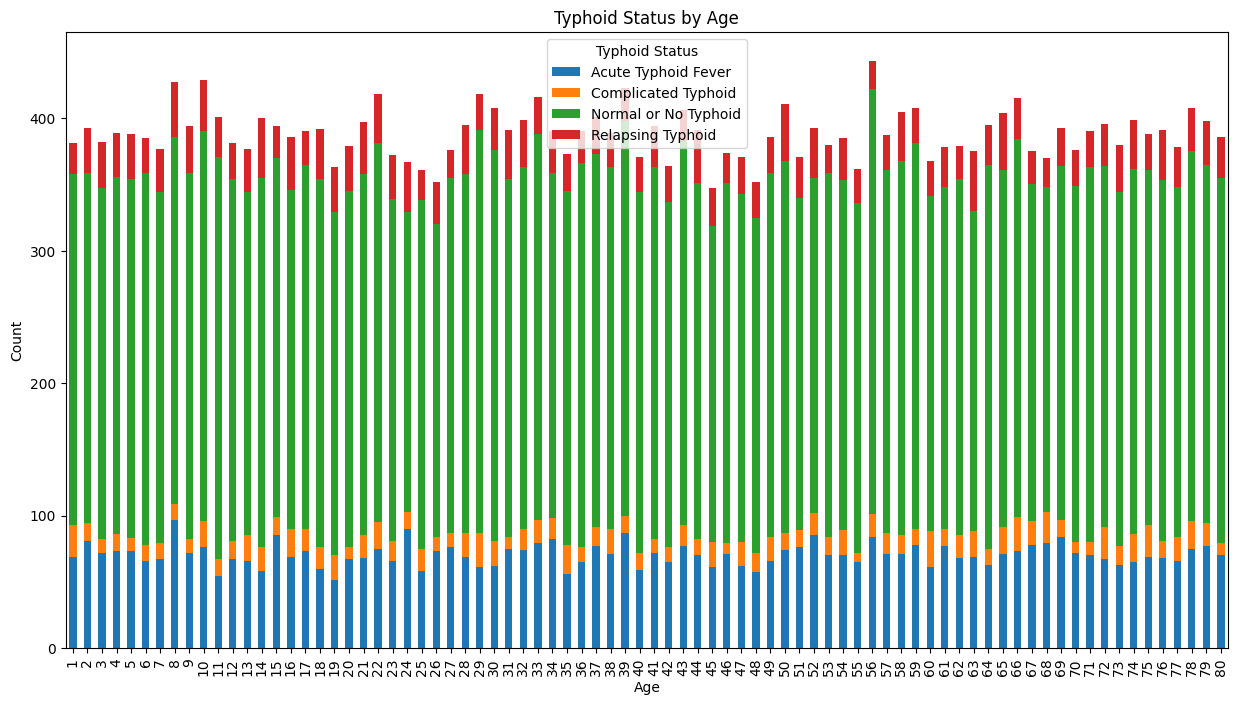

In [26]:
df_grouped = df.groupby(['Age', 'Typhoid Status']).size().reset_index(name='Count')

df_pivoted = df_grouped.pivot_table(index='Age', columns=['Typhoid Status'], values='Count', fill_value=0)

df_pivoted.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Typhoid Status by Age')
plt.show()

### Subtask:
Generate a grouped bar chart to show the relationship between Socioeconomic Status and Typhoid Diagnostics.


/tmp/ipython-input-1810483931.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_socio_water = df.groupby(['Socioeconomic Status', 'Typhoid Status']).size().reset_index(name='Count')
/tmp/ipython-input-1810483931.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_socio_water_pivoted = df_socio_water.pivot_table(index='Typhoid Status', columns='Socioeconomic Status', values='Count', fill_value=0)


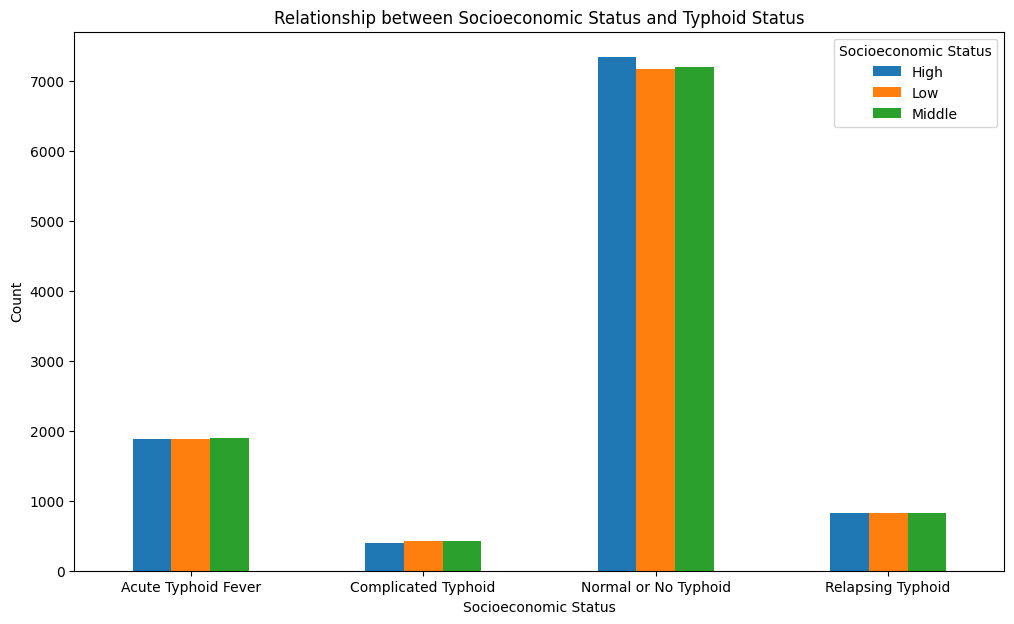

In [27]:
df_socio_water = df.groupby(['Socioeconomic Status', 'Typhoid Status']).size().reset_index(name='Count')
df_socio_water_pivoted = df_socio_water.pivot_table(index='Typhoid Status', columns='Socioeconomic Status', values='Count', fill_value=0)

df_socio_water_pivoted.plot(kind='bar', figsize=(12, 7))
plt.title('Relationship between Socioeconomic Status and Typhoid Status')
plt.xlabel('Socioeconomic Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 3.2 Risk Factors Visualization
(Water Source Type, Sanitation Facilities, Hand Hygiene, Consumption of Street Food, Weather Condition)



### Overview

In [28]:

for c in ["Water Source Type","Sanitation Facilities","Hand Hygiene","Street Food Consumption","Weather Conditions"]:
    if c in df.columns:
        tab = pd.crosstab(df[c], df[target_col], normalize="index")
        display(tab.head(10))


Typhoid Status,Acute Typhoid Fever,Complicated Typhoid,Normal or No Typhoid,Relapsing Typhoid
Water Source Type,,,,
River,0.177280,0.038207,0.703133,0.081381
Tap,0.176678,0.039739,0.699935,0.083648
Untreated Supply,0.178608,0.041128,0.701500,0.078764
Well,0.194175,0.041901,0.687787,0.076137


Typhoid Status,Acute Typhoid Fever,Complicated Typhoid,Normal or No Typhoid,Relapsing Typhoid
Sanitation Facilities,,,,
Open Defecation,0.181519,0.040905,0.694863,0.082714
Proper,0.181911,0.039585,0.701255,0.077248


Typhoid Status,Acute Typhoid Fever,Complicated Typhoid,Normal or No Typhoid,Relapsing Typhoid
Hand Hygiene,,,,
No,0.181303,0.040139,0.700019,0.078539
Yes,0.182128,0.040344,0.696133,0.081395



### Subtask:
Analyze and visualize the relationship between Typhoid Status and Weather Condition.

/tmp/ipython-input-383727622.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_weather_status = df.groupby(['Weather Condition', 'Typhoid Status']).size().reset_index(name='Count')
/tmp/ipython-input-383727622.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_weather_status_pivoted = df_weather_status.pivot_table(index='Typhoid Status', columns='Weather Condition', values='Count', fill_value=0)


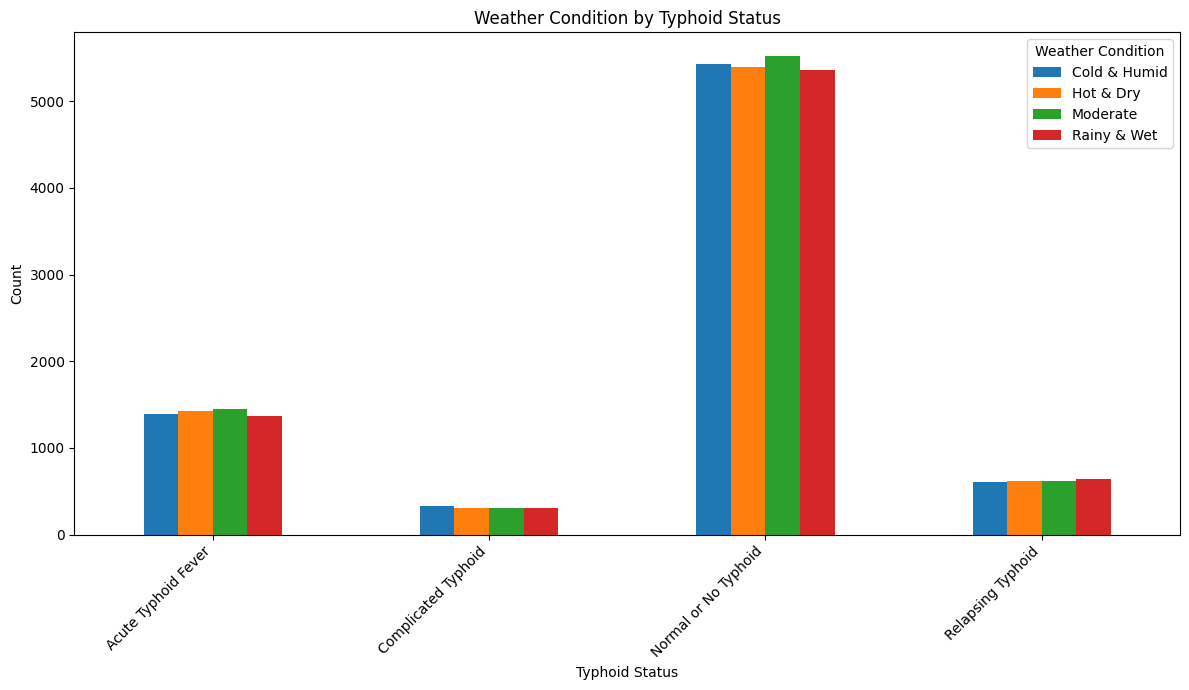

In [29]:
df_weather_status = df.groupby(['Weather Condition', 'Typhoid Status']).size().reset_index(name='Count')

df_weather_status_pivoted = df_weather_status.pivot_table(index='Typhoid Status', columns='Weather Condition', values='Count', fill_value=0)

df_weather_status_pivoted.plot(kind='bar', figsize=(12, 7))
plt.title('Weather Condition by Typhoid Status')
plt.xlabel('Typhoid Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3.3 Patient History visualization


### Overview

In [31]:
for c in ["Typhoid Vaccination Status","Previous History of Typhoid","Ongoing Infection in Society"]:
    if c in df.columns:
        tab = pd.crosstab(df[c], df[target_col], normalize="index")
        display(tab)


Typhoid Status,Acute Typhoid Fever,Complicated Typhoid,Normal or No Typhoid,Relapsing Typhoid
Typhoid Vaccination Status,,,,
Not Received,0.182408,0.039101,0.697079,0.081413
Received,0.181021,0.041387,0.699072,0.078520


Typhoid Status,Acute Typhoid Fever,Complicated Typhoid,Normal or No Typhoid,Relapsing Typhoid
Previous History of Typhoid,,,,
No,0.183568,0.038303,0.69597,0.082160
Yes,0.179878,0.042166,0.70016,0.077796


Typhoid Status,Acute Typhoid Fever,Complicated Typhoid,Normal or No Typhoid,Relapsing Typhoid
Ongoing Infection in Society,,,,
COVID-19 Surge,0.182213,0.037312,0.698186,0.082290
Dengue Outbreak,0.185229,0.036603,0.697147,0.081021
None,0.179297,0.043620,0.693750,0.083333
Seasonal Flu,0.180162,0.043396,0.703062,0.073381


### Subtask:
Create a grouped bar chart to compare Typhoid Status based on Typhoid Vaccination Status and Previous History of Typhoid.

/tmp/ipython-input-4025407268.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_vaccination_history_status = df.groupby(['Typhoid Vaccination Status', 'Previous History of Typhoid', 'Typhoid Status']).size().reset_index(name='Count')
/tmp/ipython-input-4025407268.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_vaccination_history_status_pivoted = df_vaccination_history_status.pivot_table(


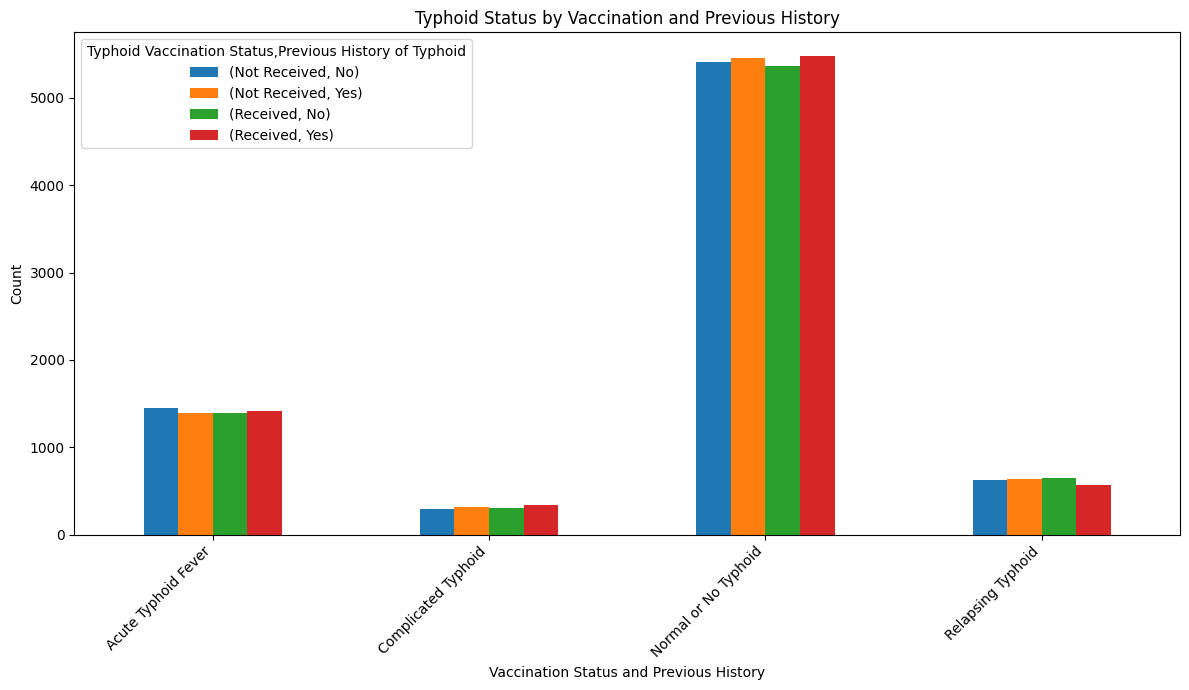

In [32]:
df_vaccination_history_status = df.groupby(['Typhoid Vaccination Status', 'Previous History of Typhoid', 'Typhoid Status']).size().reset_index(name='Count')

df_vaccination_history_status_pivoted = df_vaccination_history_status.pivot_table(
    index='Typhoid Status',
    columns=['Typhoid Vaccination Status', 'Previous History of Typhoid'],
    values='Count',
    fill_value=0
)

df_vaccination_history_status_pivoted.plot(kind='bar', figsize=(12, 7))
plt.title('Typhoid Status by Vaccination and Previous History')
plt.xlabel('Vaccination Status and Previous History')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3.4 Clinical & Diagnostics visualization


### Subtask:
Compare the frequency of Gastrointestinal and Neurological Symptoms between positive and negative cases using a grouped bar chart.

/tmp/ipython-input-1539126082.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gastro_grouped = df_filtered.groupby(['Typhoid Status', 'Gastrointestinal Symptoms']).size().reset_index(name='Count')
/tmp/ipython-input-1539126082.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_gastro_pivoted = df_gastro_grouped.pivot_table(index='Typhoid Status', columns='Gastrointestinal Symptoms', values='Count', fill_value=0)
/tmp/ipython-input-1539126082.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tru

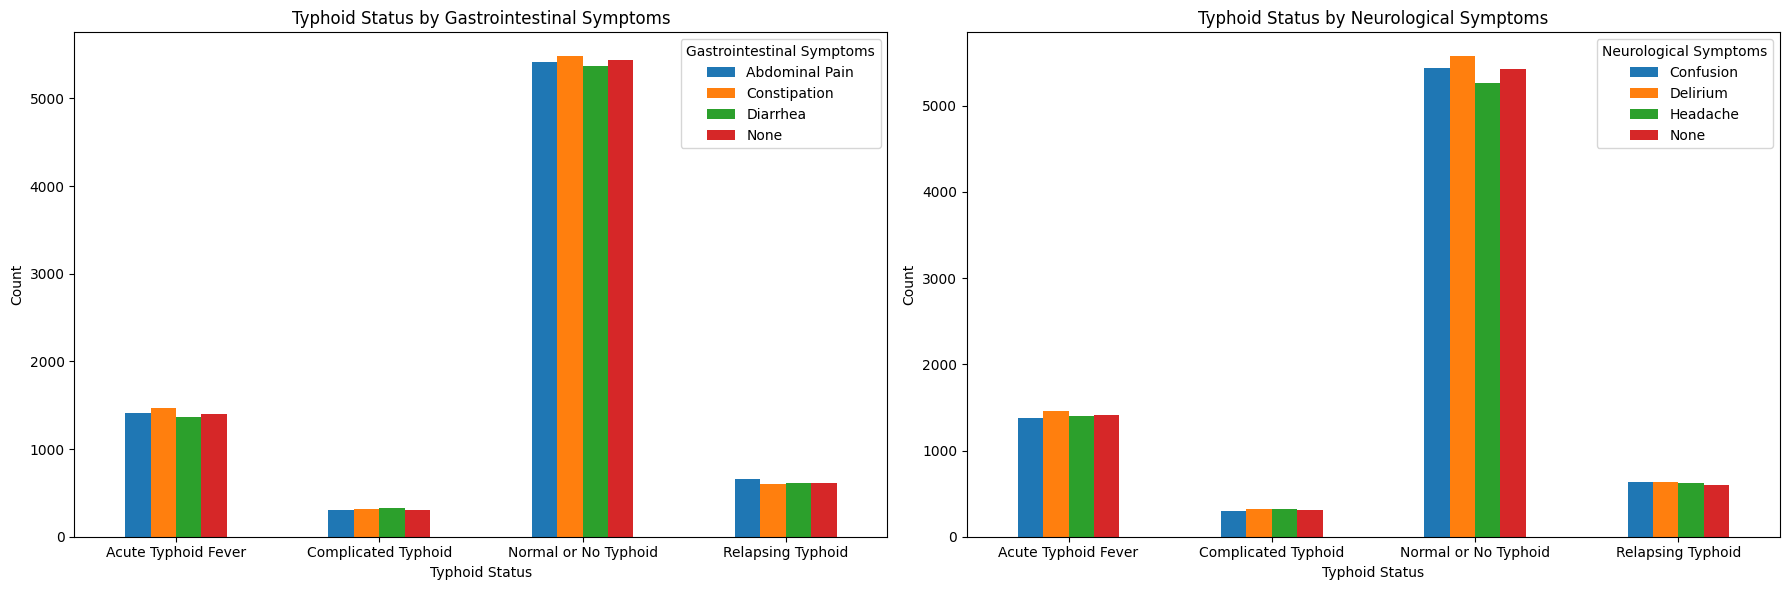

In [33]:
# Filter for positive and negative typhoid cases
positive_typhoid = ['Acute Typhoid Fever', 'Complicated Typhoid', 'Relapsing Typhoid']
df_filtered = df[df['Typhoid Status'].isin(positive_typhoid) | (df['Typhoid Status'] == 'Normal or No Typhoid')]

# Group and count for Gastrointestinal Symptoms
df_gastro_grouped = df_filtered.groupby(['Typhoid Status', 'Gastrointestinal Symptoms']).size().reset_index(name='Count')
df_gastro_pivoted = df_gastro_grouped.pivot_table(index='Typhoid Status', columns='Gastrointestinal Symptoms', values='Count', fill_value=0)

# Group and count for Neurological Symptoms
df_neuro_grouped = df_filtered.groupby(['Typhoid Status', 'Neurological Symptoms']).size().reset_index(name='Count')
df_neuro_pivoted = df_neuro_grouped.pivot_table(index='Typhoid Status', columns='Neurological Symptoms', values='Count', fill_value=0)

# Create grouped bar chart for Gastrointestinal Symptoms
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

df_gastro_pivoted.plot(kind='bar', ax=axes[0])
axes[0].set_title('Typhoid Status by Gastrointestinal Symptoms')
axes[0].set_xlabel('Typhoid Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Create grouped bar chart for Neurological Symptoms
df_neuro_pivoted.plot(kind='bar', ax=axes[1])
axes[1].set_title('Typhoid Status by Neurological Symptoms')
axes[1].set_xlabel('Typhoid Status')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## 3.5 Multivariate

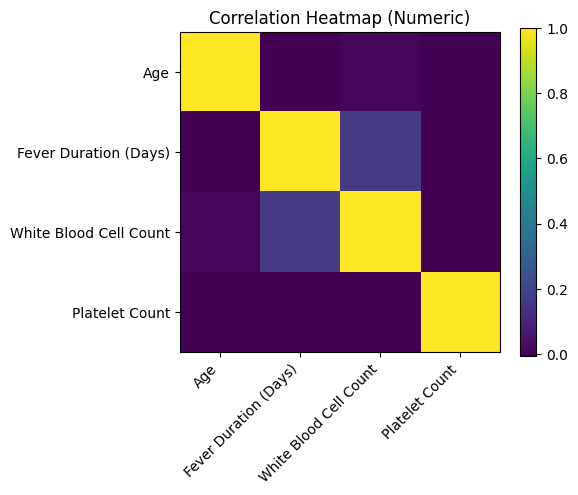

In [34]:

num_cols = [c for c in ["Age","Fever Duration (Days)","White Blood Cell Count","Platelet Count"] if c in df.columns]
numeric_df = df[num_cols].dropna()
if not numeric_df.empty:
    corr = numeric_df.corr(numeric_only=True)
    fig, ax = plt.subplots(figsize=(6,5))
    im = ax.imshow(corr.values, interpolation="nearest")
    ax.set_title("Correlation Heatmap (Numeric)")
    ax.set_xticks(range(len(corr.columns))); ax.set_yticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=45, ha="right"); ax.set_yticklabels(corr.columns)
    fig.colorbar(im); plt.tight_layout(); plt.show()



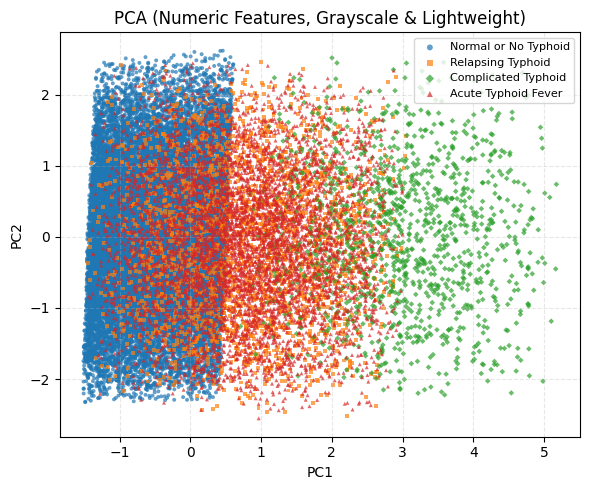

In [35]:
# Standardize & apply PCA
scaler = StandardScaler()
Xs = scaler.fit_transform(numeric_df.values)
y = df.loc[numeric_df.index, target_col]

Xp = PCA(n_components=3, random_state=42).fit_transform(Xs)

# --- Grayscale PCA Plot (smaller + lighter) ---
plt.figure(figsize=(6,5))

unique_classes = list(y.unique())
gray_shades = np.linspace(0.1, 0.8, len(unique_classes))
markers = ['o', 's', 'D', '^', 'P', 'X', '*', 'v', '<', '>']

for i, cls in enumerate(unique_classes):
    mask = (y == cls).values
    plt.scatter(
        Xp[mask, 0], Xp[mask, 1],
        s=8,
        alpha=0.7,                       # transparency (0 = invisible, 1 = solid)
        label=str(cls),
        marker=markers[i % len(markers)],
        edgecolors='none'                # remove dark outlines for a cleaner look
    )

plt.title("PCA (Numeric Features, Grayscale & Lightweight)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=1.5, fontsize=8, frameon=True)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

- From PCA as an EDA tool, we can see that the numeric features really helps with distinguishing between "Normal or No Typhoid" and "Complicated Typhoid". It cannot really help with "Relapsing Typhoid" and "Acute Typhoid Fever"
- No need to use PCA in preprocessing because we are using tree-based models

## Summarize findings




Section Findings
1) Demographic Overview

- Age: Broad spread (mean ≈ 40.5; median 40; std ≈ 23.1; range 1–80). ANOVA indicates no significant difference in mean Age across classes (F=1.41, p=0.238).

- Gender, Location, SES: Row-normalized crosstabs show similar class mixes across levels with only small shifts. No practically strong standalone demographic discriminator emerged.

- Implication: Keep Age (numeric) and basic demographics (categorical) for completeness and potential interactions, but expect low standalone importance.

2) Risk Factors

- Water Source, Sanitation, Hand Hygiene, Street Food, Weather: Stacked proportions show small changes in class composition by category.

- Chi-square + Cramér’s V indicate very weak marginal associations (V typically < 0.02).

- Implication: Individually weak, but retain them; boosting can leverage combinatorial splits (e.g., Water × Sanitation × SES).

3) Patient History

- Vaccination, Previous Typhoid, Ongoing Infection in Society: Crosstabs suggest subtle shifts (e.g., vaccinated groups slightly favor milder status; prior typhoid/ongoing infection tilt toward non-mild), yet effect sizes are tiny in marginal tests.

- Implication: Preserve for conditional effects; quantify contribution with permutation importance/group ablation during modeling.

4) Clinical Data

- Fever Duration (Days): Highly discriminative (ANOVA F=20320.81, p≈0). Distributions clearly separate across classes.

- Binary symptoms (GI/Neurological/Skin): Proportion tables indicate noticeable but modest shifts toward non-mild when present (exact sizes dataset-dependent).

- Implication: Fever Duration is a top numeric predictor. Symptom flags add complementary signal as categorical/binary inputs.

5) Diagnostic Tests

- WBC Count: Strong between-class differences (ANOVA F=5981.75, p≈0) → key feature.

- Platelet Count: Not significant (F=0.39, p=0.76).

- Widal/Typhidot: A nominal p just below 0.05 for Widal but negligible effect size (V≈0.016); Typhidot not significant. Treat as weak marginal features.

- Implication: Expect WBC (and Fever Duration) to dominate importance; include test outcomes as supportive categorical features.

6) Target Variable

- Typhoid Status is imbalanced (see class count plot/table).
- Implication: Use StratifiedKFold, report macro-F1, balanced accuracy, per-class recall/AUC-OVR; compare class_weight vs SMOTE/SMOTE-Tomek.

7) Multivariate Patterns

- Correlation (numeric): No problematic collinearity; features contribute complementary signal.

- PCA (2D): Partial class separation with overlap → confirms the need for non-linear learners.

- Implication: Boosting (XGBoost/LightGBM/CatBoost) suits the problem; PCA used for EDA visualization, not required for tree-based models.

Key Takeaways for Modeling (Boosting Focus)

- High-value numerics: Fever Duration and WBC → likely top features across all boosting models.

- Low-value numerics: Platelets, Age → expect low importance; keep for completeness/interactions.

- Categoricals: Weak marginally, but keep Risk, History, Demography, and Widal/Typhidot—boosting can exploit interactions (try feature group ablations).

- Imbalance handling: Stratified CV + macro-F1, balanced accuracy; test class_weight and SMOTE/SMOTE-Tomek.

- Explainability: Use permutation importance and SHAP to surface which category levels raise risk for Acute/Relapse vs Mild.

# 4. Data Preprocessing

## 4.1 Separate features and target

In [36]:
target_col = "Typhoid Status"

X = df.drop(columns=[target_col])
y = df[target_col]

In [37]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numeric columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")


Numeric columns: ['Age', 'Fever Duration (Days)', 'White Blood Cell Count', 'Platelet Count']
Categorical columns: ['Gender', 'Location', 'Socioeconomic Status', 'Water Source Type', 'Sanitation Facilities', 'Hand Hygiene', 'Consumption of Street Food', 'Gastrointestinal Symptoms', 'Neurological Symptoms', 'Skin Manifestations', 'Widal Test', 'Typhidot Test', 'Typhoid Vaccination Status', 'Previous History of Typhoid', 'Weather Condition', 'Ongoing Infection in Society']


## 4.2 Train / test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 4.3 Preprocess pipeline

In [60]:
# 1. Normal
X_train_normal = X_train.copy()
X_test_normal  = X_test.copy()
y_train_normal = y_train.copy()
y_test_normal  = y_test.copy()


# 2. OneHot (encode categoricals only)
onehot_pipe = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

X_train_onehot = onehot_pipe.fit_transform(X_train)
X_test_onehot  = onehot_pipe.transform(X_test)
y_train_onehot = y_train.copy() # Target does not need one-hot encoding for classification
y_test_onehot  = y_test.copy()


# 3. Scaled (scale numeric + one-hot categoricals)
scaled_pipe = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

X_train_scaled = scaled_pipe.fit_transform(X_train)
X_test_scaled  = scaled_pipe.transform(X_test)
y_train_scaled = y_train.copy() # Target does not need scaling
y_test_scaled  = y_test.copy()


# 4. Label Encoder (encode categoricals and target)
X_train_label_encoded = X_train.copy()
X_test_label_encoded = X_test.copy()

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


for col in cat_cols:
    le_cat = LabelEncoder()
    X_train_label_encoded[col] = le_cat.fit_transform(X_train_label_encoded[col])
    X_test_label_encoded[col] = le_cat.transform(X_test_label_encoded[col])

# 5. Model Building & Evaluation

## 5.1 Logistic Regression (Baseline)

### 5.1.1 Hyperparameter Tuning

In [40]:
# # --- Logistic Regression classifier + parameter grid ---
# lr_clf = LogisticRegression(
#     multi_class="auto",
#     class_weight="balanced",
#     random_state=42,
#     max_iter=1000,
#     solver='saga',
#     n_jobs=-1
# )


# param_grid = {
#     'C': [0.1, 1, 10],
#     'penalty': ['l1', 'l2']
# }

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # --- setup grid search (not fitting yet) ---
# grid_search = GridSearchCV(
#     estimator=lr_clf,
#     param_grid=param_grid,
#     cv=cv,
#     scoring="f1_macro",
#     n_jobs=-1,
#     verbose=2,
#     error_score="raise"
# )

# # --- Fit on training data ---
# grid_search.fit(X_train_scaled, y_train)

# # Now it exists
# print("Best parameters found:")
# print(grid_search.best_params_)

# # Optional: print the best macro-F1 score
# print("Best CV Macro-F1:", grid_search.best_score_)

### 5.1.2 Final Model

In [75]:
# Final configuration
lr_clf = LogisticRegression(
    multi_class="auto",
    class_weight="balanced",
    random_state=42,
    max_iter=1000,
    solver='saga',
    n_jobs=-1,
    C=10,
    penalty='l1'
)

# Train the model
lr_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_clf.predict(X_test_scaled)
y_train_pred_lr = lr_clf.predict(X_train_scaled)
y_proba_lr = lr_clf.predict_proba(X_test_scaled)

# Evaluation
acc_train_lr = accuracy_score(y_train, y_train_pred_lr)
acc_test_lr = accuracy_score(y_test, y_pred_lr)
f1m_train_lr = f1_score(y_train, y_train_pred_lr, average="macro")
f1m_test_lr = f1_score(y_test, y_pred_lr, average="macro")

print("=== Logistic Regression Results ===")
print(f"Train Accuracy (Logit): {acc_train_lr:.4f}")
print(f"Test  Accuracy (Logit): {acc_test_lr:.4f}")
print(f"Train Macro-F1 (Logit): {f1m_train_lr:.4f}")
print(f"Test  Macro-F1 (Logit): {f1m_test_lr:.4f}")

# Classification report
print("\nClassification Report (Logit - Test):")
print(classification_report(y_test, y_pred_lr, digits=4))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


=== Logistic Regression Results ===
Train Accuracy (Logit): 0.8734
Test  Accuracy (Logit): 0.8765
Train Macro-F1 (Logit): 0.7479
Test  Macro-F1 (Logit): 0.7480

Classification Report (Logit - Test):
                      precision    recall  f1-score   support

 Acute Typhoid Fever     0.7026    0.5401    0.6107      1085
 Complicated Typhoid     1.0000    1.0000    1.0000       253
Normal or No Typhoid     0.9854    1.0000    0.9926      4381
   Relapsing Typhoid     0.3358    0.4609    0.3885       499

            accuracy                         0.8765      6218
           macro avg     0.7559    0.7503    0.7480      6218
        weighted avg     0.8845    0.8765    0.8778      6218



### 5.1.3 More Evaluation

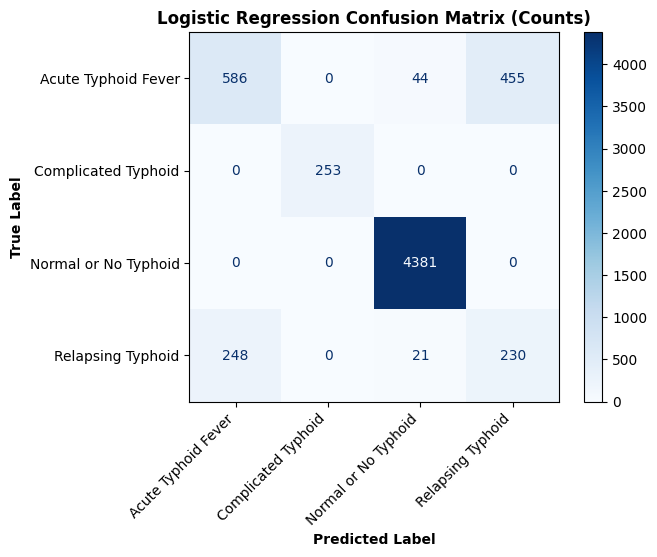

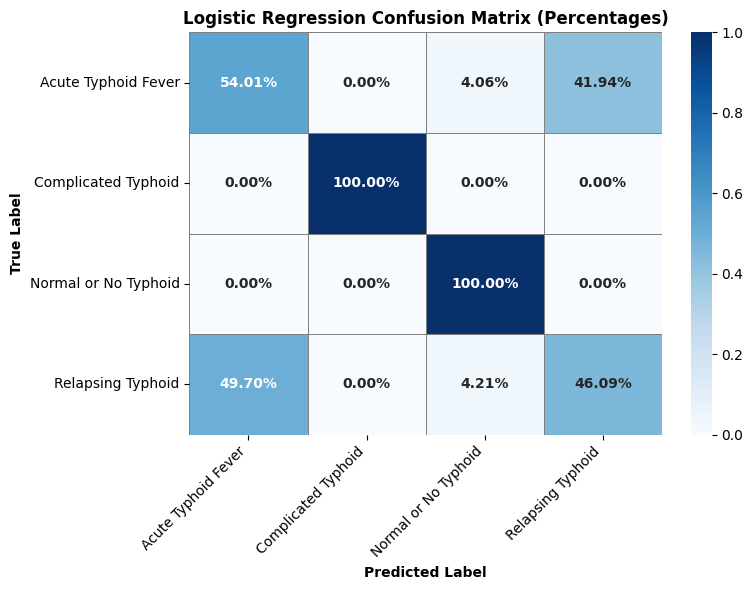

In [76]:
# Get the unique class labels
labels = sorted(y_test.unique())

# Calculate the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=labels)

# Display the confusion matrix with counts
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix (Counts)', fontweight='bold') # Make title bold
plt.xlabel('Predicted Label', fontweight='bold') # Make x-label bold
plt.ylabel('True Label', fontweight='bold') # Make y-label bold
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate the percentage of correctly classified instances for each class
cm_lr_percent = cm_lr.astype('float') / cm_lr.sum(axis=1)[:, np.newaxis]

# Display the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_lr_percent,
    annot=True,
    fmt=".2%",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={'weight': 'bold'} # Make annotation text bold
)
plt.title('Logistic Regression Confusion Matrix (Percentages)', fontweight='bold') # Make title bold
plt.xlabel('Predicted Label', fontweight='bold') # Make x-label bold
plt.ylabel('True Label', fontweight='bold') # Make y-label bold
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Macro-averaged AUC (Logistic Regression): 0.9540


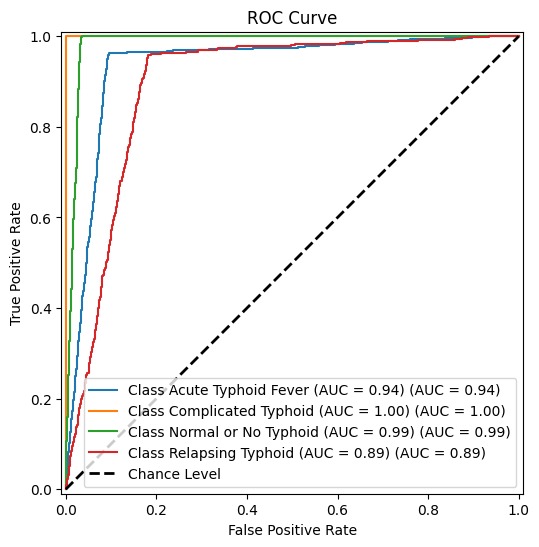

In [77]:
# Binarize the target variable
y_test_bin = label_binarize(y_test, classes=sorted(y_test.unique()))

# Calculate overall macro-averaged AUC
auc_macro_lr = roc_auc_score(y_test_bin, y_proba_lr, average="macro")
print(f"Macro-averaged AUC (Logistic Regression): {auc_macro_lr:.4f}")

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_proba_lr[:, i],
        name=f"Class {sorted(y_test.unique())[i]} (AUC = {roc_auc_score(y_test_bin[:, i], y_proba_lr[:, i]):.2f})",
        ax=plt.gca()
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance Level')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## 5.2 AdaBoostClassifier (Boosting baseline)

### 5.2.1 Hyperparameter Tuning

In [51]:
# # Base learner
# base_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# # Model shell
# ada_classifier = AdaBoostClassifier(estimator=base_tree, random_state=42)

# # Parameter grid
# param_grid = {
#     "estimator__max_depth": [6, 7],
#     "estimator__min_samples_leaf": [9, 10, 11],
#     "n_estimators": [1000],
#     "learning_rate": [0.08, 0.07]
# }


# cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# grid = GridSearchCV(
#     ada_classifier,
#     param_grid=param_grid,
#     cv=cv,
#     scoring="f1_macro",
#     n_jobs=-1,
#     error_score="raise"   # ← key change: raise the underlying error
# )

# grid.fit(X_train_onehot, y_train)
# print(grid.best_params_, grid.best_score_)

### 5.2.2 Final Model

In [73]:
# Final configuration
base_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, random_state=42, class_weight='balanced')

ada_classifier = AdaBoostClassifier(
    estimator=base_tree,
    n_estimators=30,
    learning_rate=0.1,
    random_state=42
)

# Train the model
ada_classifier.fit(X_train_onehot, y_train)

# Predictions
y_train_pred_ada = ada_classifier.predict(X_train_onehot)
y_test_pred_ada  = ada_classifier.predict(X_test_onehot)
y_test_proba_ada = ada_classifier.predict_proba(X_test_onehot)

# Evaluation
acc_train_ada = accuracy_score(y_train, y_train_pred_ada)
acc_test_ada  = accuracy_score(y_test,  y_test_pred_ada)
f1m_train_ada = f1_score(y_train, y_train_pred_ada, average="macro")
f1m_test_ada  = f1_score(y_test,  y_test_pred_ada,  average="macro")

print("=== AdaBoost Classifier Results ===")
print(f"Train Accuracy (Ada): {acc_train_ada:.4f}")
print(f"Test  Accuracy (Ada): {acc_test_ada:.4f}")
print(f"Train Macro-F1 (Ada): {f1m_train_ada:.4f}")
print(f"Test  Macro-F1 (Ada): {f1m_test_ada:.4f}")

# Classification report
print("\nClassification Report (AdaBoost - Test):")
print(classification_report(y_test, y_test_pred_ada, digits=4))

=== AdaBoost Classifier Results ===
Train Accuracy (Ada): 0.8946
Test  Accuracy (Ada): 0.8797
Train Macro-F1 (Ada): 0.7870
Test  Macro-F1 (Ada): 0.7472

Classification Report (AdaBoost - Test):
                      precision    recall  f1-score   support

 Acute Typhoid Fever     0.6946    0.5889    0.6374      1085
 Complicated Typhoid     1.0000    1.0000    1.0000       253
Normal or No Typhoid     0.9854    1.0000    0.9926      4381
   Relapsing Typhoid     0.3289    0.3948    0.3588       499

            accuracy                         0.8797      6218
           macro avg     0.7522    0.7459    0.7472      6218
        weighted avg     0.8825    0.8797    0.8801      6218



### 5.2.3 More Evaluation

In [74]:
# Confusion matrix
labels = sorted(y_test.unique().tolist())
print("\nConfusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_pred_ada, labels=labels))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred_ada, labels=labels))


Confusion Matrix (Train):
[[ 2894     0   196  1474]
 [    0   998     0     0]
 [    0     0 17320     0]
 [  860     0    92  1035]]

Confusion Matrix (Test):
[[ 639    0   44  402]
 [   0  253    0    0]
 [   0    0 4381    0]
 [ 281    0   21  197]]


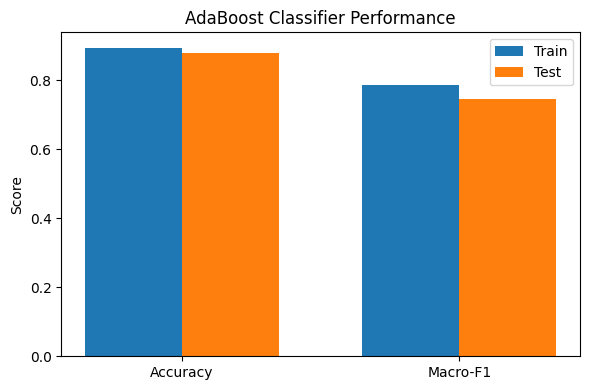

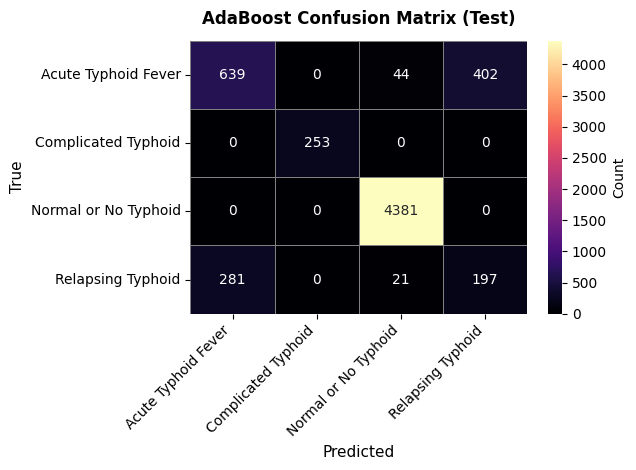

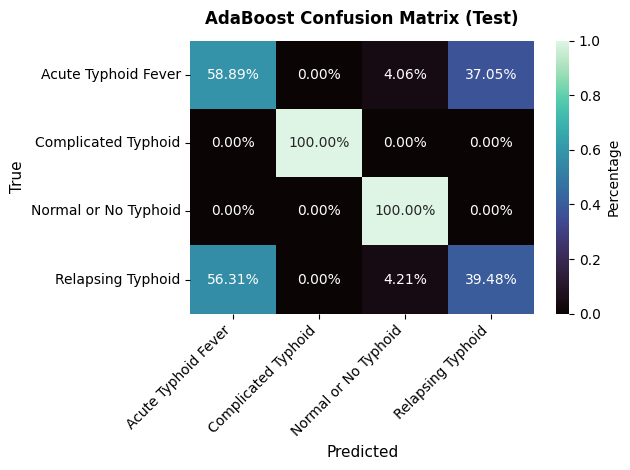

In [54]:
# ---- Bar Chart for AdaBoost ----
metrics = ["Accuracy", "Macro-F1"]
train_vals = [acc_train_ada, f1m_train_ada]
test_vals  = [acc_test_ada,  f1m_test_ada]

x = np.arange(len(metrics))
w = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - w/2, train_vals, width=w, label="Train")
plt.bar(x + w/2, test_vals,  width=w, label="Test")
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("AdaBoost Classifier Performance")
plt.legend()
plt.tight_layout()
plt.show()

# ---- Confusion Matrix Heatmap (AdaBoost) ----
# Calculate the confusion matrix using y_test and y_test_pred_ada
cm_ada = confusion_matrix(y_test, y_test_pred_ada, labels=labels)

sns.heatmap(
    cm_ada,
    annot=True,
    fmt="d",
    cmap="magma",
    cbar_kws={"label": "Count"},
    xticklabels=labels,
    yticklabels=labels,
    linewidths=0.5,
    linecolor='gray'
)

plt.title("AdaBoost Confusion Matrix (Test)", fontsize=12, weight="bold", pad=12)
plt.xlabel("Predicted", fontsize=11)
plt.ylabel("True", fontsize=11)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ---- Confusion Matrix Percentage Heatmap (AdaBoost) ----
sns.heatmap(cm_ada / np.sum(cm_ada, axis=1, keepdims=True), cbar_kws={"label": "Percentage"},
            annot=True, fmt=".2%", cmap="mako", xticklabels=labels, yticklabels=labels,)


plt.title("AdaBoost Confusion Matrix (Test)", fontsize=12, weight="bold", pad=12)
plt.xlabel("Predicted", fontsize=11)
plt.ylabel("True", fontsize=11)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 5.3 CatBoost

### 5.3.1 Hyperparameter Tuning

In [65]:
# # --- get indices of categorical features ---
# cat_idxs = X_train_normal.select_dtypes(include=['category']).columns.tolist()
# cat_idxs = [X_train_normal.columns.get_loc(col) for col in cat_idxs]

# classes = np.unique(y_train_encoded)
# class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train_encoded).tolist()

# # --- CV splitter ---
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # --- CatBoost classifier (set bootstrap_type to allow subsample) ---
# cbc = CatBoostClassifier(
#     loss_function="MultiClass",
#     eval_metric="TotalF1",
#     random_state=42,
#     verbose=0,
#     class_weights=class_weights,
#     bootstrap_type="Bernoulli"  # <-- key change so 'subsample' is valid
# )

# # --- param grid (mirrors your LightGBM-style knobs) ---
# param_grid = {
#     "depth": [4, 6, 8],
#     "min_data_in_leaf": [50, 51, 52],
#     "learning_rate": [0.04, 0.05, 0.06],
#     "n_estimators": [550, 600, 650],
#     "rsm": [0.8],           # feature fraction
#     "subsample": [0.8],     # bagging fraction (valid with Bernoulli)
#     "l2_leaf_reg": [0.0, 1.0],
# }

# grid_search = GridSearchCV(
#     estimator=cbc,
#     param_grid=param_grid,
#     cv=cv,
#     scoring="f1_macro",
#     n_jobs=-1,
#     verbose=2,
#     error_score="raise"
# )

# # --- Fit on training data (pass cat_features) ---
# grid_search.fit(X_train_normal, y_train_encoded, cat_features=cat_idxs)

# print("Best parameters found (CatBoost):")
# print(grid_search.best_params_)
# print("Best CV Macro-F1 (CatBoost):", grid_search.best_score_)

### 5.3.2 Final Model

In [71]:
cat_idxs = X_train_normal.select_dtypes(include=['category']).columns.tolist()
cat_idxs = [X_train_normal.columns.get_loc(col) for col in cat_idxs]

classes = np.unique(y_train_encoded)
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train_encoded).tolist()

# Final configuration
cb_manual = CatBoostClassifier(
    loss_function="MultiClass",
    random_state=42,
    verbose=0,
    class_weights=class_weights,
    bootstrap_type="Bernoulli",
    depth=10,
    min_data_in_leaf=80,
    learning_rate=0.02,
    n_estimators=900,
    rsm=0.8,
    subsample=0.8,
    l2_leaf_reg=3.0)

# Train the model
cb_manual.fit(X_train_normal, y_train_encoded, cat_features=cat_idxs)

# Prediction
y_pred_tr_enc = cb_manual.predict(X_train_normal)
y_pred_te_enc = cb_manual.predict(X_test_normal)

# Evaluation
acc_train = accuracy_score(y_train_encoded, y_pred_tr_enc)
f1m_train = f1_score(y_train_encoded, y_pred_tr_enc, average="macro")
acc_test  = accuracy_score(y_test_encoded, y_pred_te_enc)
f1m_test  = f1_score(y_test_encoded, y_pred_te_enc, average="macro")

print("=== CatBoost Classifier Results ===")
print(f"CatBoost - Train Accuracy: {acc_train:.4f}")
print(f"CatBoost - Train Macro-F1: {f1m_train:.4f}")
print(f"CatBoost - Test  Accuracy: {acc_test:.4f}")
print(f"CatBoost - Test  Macro-F1: {f1m_test:.4f}")

# Classification report
y_pred_te = le.inverse_transform(y_pred_te_enc.astype(int))
y_true_te = le.inverse_transform(y_test_encoded.astype(int))

print("\nClassification Report (CatBoost - Test):")
print(classification_report(y_true_te, y_pred_te, digits=4))



=== CatBoost Classifier Results ===
CatBoost - Train Accuracy: 0.9604
CatBoost - Train Macro-F1: 0.9227
CatBoost - Test  Accuracy: 0.8860
CatBoost - Test  Macro-F1: 0.7422

Classification Report (CatBoost - Test):
                      precision    recall  f1-score   support

 Acute Typhoid Fever     0.6860    0.6747    0.6803      1085
 Complicated Typhoid     0.9883    1.0000    0.9941       253
Normal or No Typhoid     0.9854    1.0000    0.9926      4381
   Relapsing Typhoid     0.3185    0.2866    0.3017       499

            accuracy                         0.8860      6218
           macro avg     0.7445    0.7403    0.7422      6218
        weighted avg     0.8797    0.8860    0.8827      6218



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 5.3.3 More Evaluation

In [72]:
cm_cb = confusion_matrix(y_true_te, y_pred_te, labels=le.classes_)
print("Confusion Matrix (Test) [CatBoost Manual]:")
print(cm_cb)
print("Label order:", list(le.classes_))

Confusion Matrix (Test) [CatBoost Manual]:
[[ 732    3   44  306]
 [   0  253    0    0]
 [   0    0 4381    0]
 [ 335    0   21  143]]
Label order: ['Acute Typhoid Fever', 'Complicated Typhoid', 'Normal or No Typhoid', 'Relapsing Typhoid']


## 5.4 LightGBM

### 5.4.1 Hyperparameter Tuning

In [ ]:
# # --- CV splitter ---
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # --- LightGBM classifier + parameter grid ---
# lgb_clf = LGBMClassifier(
#     objective="multiclass",
#     class_weight="balanced",
#     random_state=42,
#     verbosity=-1
# )

# param_grid = {
#     "num_leaves": [6, 7, 8],
#     "min_child_samples": [50, 51, 52],
#     "learning_rate": [0.04, 0.05, 0.06],
#     "n_estimators": [550, 600, 650],
#     "feature_fraction": [0.8],
#     "bagging_fraction": [0.8],
#     "bagging_freq": [1],
#     "reg_lambda": [0.0, 1.0],
#     "max_depth": [-1],
# }

# # --- setup grid search (not fitting yet) ---
# grid_search = GridSearchCV(
#     estimator=lgb_clf,
#     param_grid=param_grid,
#     cv=cv,
#     scoring="f1_macro",
#     n_jobs=-1,
#     verbose=2,
#     error_score="raise"
# )

# # --- Fit on training data ---
# grid_search.fit(X_train_normal, y_train_encoded)

# # ✅ Now it exists
# print("Best parameters found:")
# print(grid_search.best_params_)

# # Optional: print the best macro-F1 score
# print("Best CV Macro-F1:", grid_search.best_score_)


### 5.4.2 Final Model

In [78]:
# Final configuration
chosen_params = {
    "objective": "multiclass",
    "class_weight": "balanced",
    "random_state": 42,
    "verbosity": -1,
    "num_leaves": 8,
    "min_child_samples": 51,
    "learning_rate": 0.05,
    "n_estimators": 650,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 1,
    "reg_lambda": 1.0,
    "max_depth": -1,
}

lgb_manual = LGBMClassifier(**chosen_params)

# Train the model
lgb_manual.fit(X_train_normal, y_train_encoded)

# Prediction
y_pred_tr_enc = lgb_manual.predict(X_train_normal)
y_pred_te_enc = lgb_manual.predict(X_test_normal)

# Evaluation
acc_train = accuracy_score(y_train_encoded, y_pred_tr_enc)
f1m_train = f1_score(y_train_encoded, y_pred_tr_enc, average="macro")
acc_test  = accuracy_score(y_test_encoded, y_pred_te_enc)
f1m_test  = f1_score(y_test_encoded, y_pred_te_enc, average="macro")

print("=== LightGBM Classifier Results ===")
print(f"LGBM (Manual) - Train Accuracy: {acc_train:.4f}")
print(f"LGBM (Manual) - Train Macro-F1: {f1m_train:.4f}")
print(f"LGBM (Manual) - Test  Accuracy: {acc_test:.4f}")
print(f"LGBM (Manual) - Test  Macro-F1: {f1m_test:.4f}")

# Classification report
y_pred_te = le.inverse_transform(y_pred_te_enc)
y_true_te = le.inverse_transform(y_test_encoded)

print("\nClassification Report (LGBM - Test):")
print(classification_report(y_true_te, y_pred_te, digits=4))


=== LightGBM Classifier Results ===
LGBM (Manual) - Train Accuracy: 0.9521
LGBM (Manual) - Train Macro-F1: 0.9082
LGBM (Manual) - Test  Accuracy: 0.8826
LGBM (Manual) - Test  Macro-F1: 0.7476

Classification Report (LGBM - Test):
                      precision    recall  f1-score   support

 Acute Typhoid Fever     0.6926    0.6230    0.6560      1085
 Complicated Typhoid     1.0000    1.0000    1.0000       253
Normal or No Typhoid     0.9854    1.0000    0.9926      4381
   Relapsing Typhoid     0.3278    0.3567    0.3417       499

            accuracy                         0.8826      6218
           macro avg     0.7515    0.7449    0.7476      6218
        weighted avg     0.8821    0.8826    0.8820      6218



### 5.4.3 More Evaluation

In [79]:
cm_lgbm = confusion_matrix(y_true_te, y_pred_te, labels=le.classes_)
print("Confusion Matrix (Test) [LGBM Manual]:")
print(cm_lgbm)
print("Label order:", list(le.classes_))

Confusion Matrix (Test) [LGBM Manual]:
[[ 676    0   44  365]
 [   0  253    0    0]
 [   0    0 4381    0]
 [ 300    0   21  178]]
Label order: ['Acute Typhoid Fever', 'Complicated Typhoid', 'Normal or No Typhoid', 'Relapsing Typhoid']


## 5.5 XGBoost

### 5.5.1 Hyperparameter Tuning

In [ ]:
# # grid = GridSearchCV(
#     estimator=XGBClassifier(
#         objective='multi:softmax',
#         num_class=4,
#         random_state=42,
#         eval_metric='logloss'
#     ),
#     param_grid={
#         "n_estimators": [200, 400],
#         "learning_rate": [0.05, 0.1],
#         "max_depth": [3, 5],
#         "subsample": [0.8, 1.0],
#         "colsample_bytree": [0.8, 1.0]
#     },
#     scoring='f1_macro',
#     cv=StratifiedKFold(n_splits=5),
#     verbose=1,
#     n_jobs=-1
# )

# grid.fit(X_train_normal, y_train_enc, sample_weight=weights)

# print("\n===== Weighted XGBoost GridSearchCV Results =====")
# print("Best Parameters:", grid.best_params_)
# print("Best Macro F1:", grid.best_score_)

### 5.5.2 Final Model

In [80]:
# Class proportions
class_proportions = {
    'Normal or No Typhoid': 0.696449,
    'Acute Typhoid Fever': 0.183522,
    'Relapsing Typhoid': 0.079899,
    'Complicated Typhoid': 0.040130
}

# Compute inverse proportions
inv_props = {k: 1/v for k, v in class_proportions.items()}

# Normalize so average weight = 1
norm_factor = sum(inv_props.values()) / len(inv_props)
class_weights = {k: v / norm_factor for k, v in inv_props.items()}

print(class_weights)

class_weight_dict = {
    0: class_weights['Acute Typhoid Fever'],
    1: class_weights['Complicated Typhoid'],
    2: class_weights['Normal or No Typhoid'],
    3: class_weights['Relapsing Typhoid']
}

weights = np.array([class_weight_dict[y] for y in y_train_encoded])

{'Normal or No Typhoid': 0.12959097710127623, 'Acute Typhoid Fever': 0.491785760896278, 'Relapsing Typhoid': 1.1295949437565769, 'Complicated Typhoid': 2.2490283182458692}


In [84]:
# Final configuration
xgb_weighted_final = XGBClassifier(
    n_estimators=1749,
    learning_rate=0.015,
    max_depth=5,
    subsample=0.79,
    colsample_bytree=0.8,
    min_child_weight=5,
    reg_alpha=2.0,
    reg_lambda=6.0,
    random_state=42,
    objective='multi:softmax',
    num_class=4,
    eval_metric='logloss',
    enable_categorical=True
)

# Train the model
xgb_weighted_final.fit(X_train_normal, y_train_encoded, sample_weight=weights)

# Predictions
y_train_pred = xgb_weighted_final.predict(X_train_normal)
y_test_pred = xgb_weighted_final.predict(X_test_normal)

# Evaluation
train_acc = accuracy_score(y_train_encoded, y_train_pred)
test_acc = accuracy_score(y_test_encoded, y_test_pred)
train_macro_f1 = f1_score(y_train_encoded, y_train_pred, average='macro')
test_macro_f1 = f1_score(y_test_encoded, y_test_pred, average='macro')

print("=== XGBoost Classifier Results ===")
print(f"Train Accuracy (XGB): {train_acc:.4f}")
print(f"Test Accuracy (XGB): {test_acc:.4f}")
print(f"Train Macro-F1 (XGB): {train_macro_f1:.4f}")
print(f"Test Macro-F1 (XGB): {test_macro_f1:.4f}\n")

# Classification report
print("Classification Report (XGBoost - Test):")
print(classification_report(y_test_encoded, y_test_pred, target_names=le.classes_, digits=4))

=== XGBoost Classifier Results ===
Train Accuracy (XGB): 0.9602
Test Accuracy (XGB): 0.8831
Train Macro-F1 (XGB): 0.9241
Test Macro-F1 (XGB): 0.7432

Classification Report (XGBoost - Test):
                      precision    recall  f1-score   support

 Acute Typhoid Fever     0.6877    0.6433    0.6648      1085
 Complicated Typhoid     0.9883    1.0000    0.9941       253
Normal or No Typhoid     0.9854    0.9995    0.9924      4381
   Relapsing Typhoid     0.3201    0.3226    0.3214       499

            accuracy                         0.8831      6218
           macro avg     0.7454    0.7414    0.7432      6218
        weighted avg     0.8802    0.8831    0.8815      6218



### 5.5.3 More Evaluation

In [85]:

# Confusion matrices
print("\nConfusion Matrix (Train):")
print(confusion_matrix(y_train_encoded, y_train_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test_encoded, y_test_pred))


Confusion Matrix (Train):
[[ 3851     2   195   516]
 [    0   998     0     0]
 [    0     7 17313     0]
 [  178     1    92  1716]]

Confusion Matrix (Test):
[[ 698    1   44  342]
 [   0  253    0    0]
 [   0    2 4379    0]
 [ 317    0   21  161]]
